In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [92]:
chd = pd.read_csv("CHD.csv")

In [93]:
chd=chd.drop('education',axis=1)

In [94]:
chd.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [95]:
chd.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [96]:
chd=chd.dropna()

In [97]:
chd.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [98]:
chd.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [99]:
chd

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [100]:
#pair plot
#sns.pairplot(data=chd,hue='TenYearCHD')

<AxesSubplot:xlabel='male', ylabel='count'>

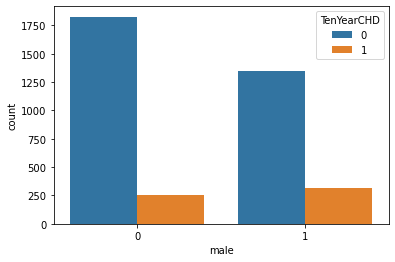

In [101]:
sns.countplot(x='male',hue='TenYearCHD',data=chd)

C:\Users\Harshali Vadher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

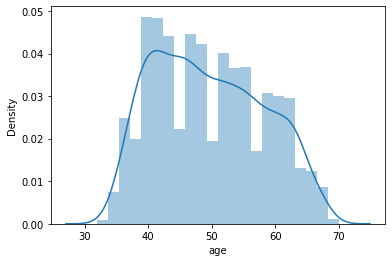

In [102]:
sns.distplot(chd['age'])

<AxesSubplot:xlabel='age', ylabel='count'>

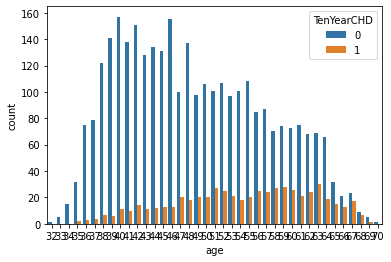

In [103]:
sns.countplot(x='age',data=chd,hue='TenYearCHD')

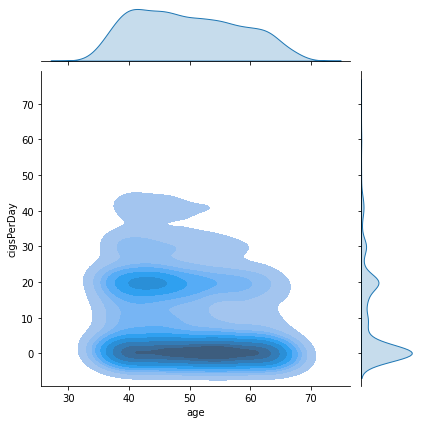

In [104]:
sns.jointplot(x='age',y='cigsPerDay',data=chd,kind='kde',fill=True)
#kind= scatter,reg,hex,hex,kde

C:\Users\Harshali Vadher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

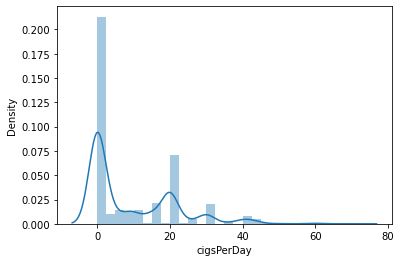

In [105]:
sns.distplot(chd['cigsPerDay'])

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

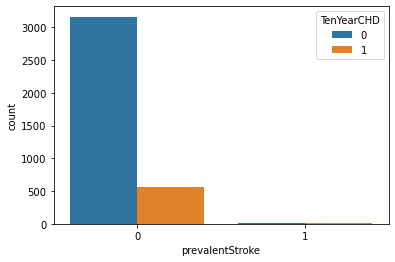

In [106]:
sns.countplot(x='prevalentStroke',data=chd,hue='TenYearCHD')

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

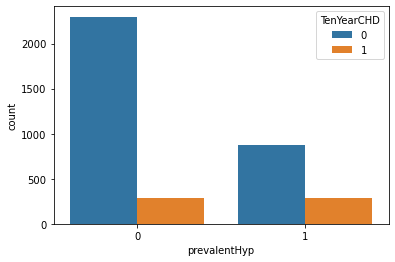

In [107]:
sns.countplot(x='prevalentHyp',data=chd,hue='TenYearCHD')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

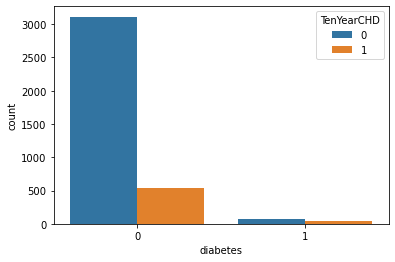

In [108]:
sns.countplot(x='diabetes',data=chd,hue='TenYearCHD')

<AxesSubplot:xlabel='totChol', ylabel='Count'>

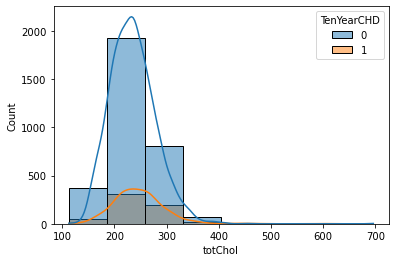

In [109]:
sns.histplot(x='totChol',hue='TenYearCHD',data=chd,bins=8,kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

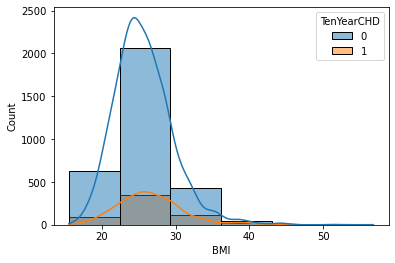

In [110]:
sns.histplot(x='BMI',hue='TenYearCHD',data=chd,bins=6,kde=True)

<AxesSubplot:xlabel='sysBP', ylabel='Count'>

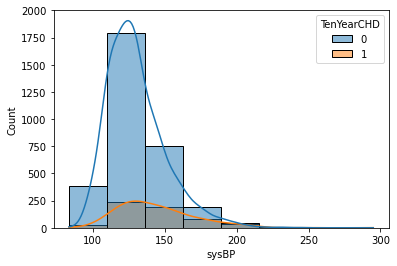

In [111]:
sns.histplot(x='sysBP',hue='TenYearCHD',data=chd,bins=8,kde=True)

<AxesSubplot:xlabel='diaBP', ylabel='Count'>

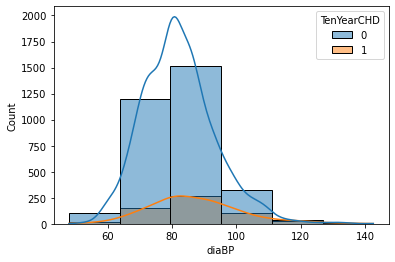

In [112]:
sns.histplot(x='diaBP',hue='TenYearCHD',data=chd,bins=6,kde=True)

<AxesSubplot:xlabel='heartRate', ylabel='Count'>

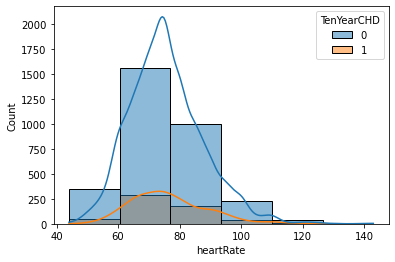

In [113]:
sns.histplot(x='heartRate',hue='TenYearCHD',data=chd,bins=6,kde=True)

<AxesSubplot:xlabel='glucose', ylabel='Count'>

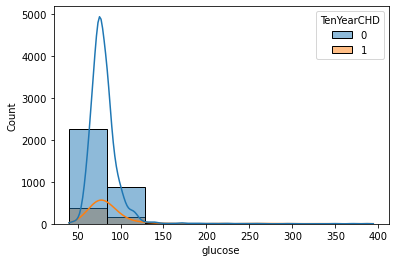

In [114]:
sns.histplot(x='glucose',hue='TenYearCHD',data=chd,bins=8,kde=True)''

In [136]:
X_train, X_test, y_train, y_test = train_test_split(chd.drop('TenYearCHD',axis=1), chd['TenYearCHD'], test_size=0.3,random_state=69)

In [137]:
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [138]:
prediction = logmodel.predict(X_test)

In [139]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       960
           1       0.72      0.08      0.14       165

    accuracy                           0.86      1125
   macro avg       0.79      0.54      0.53      1125
weighted avg       0.84      0.86      0.81      1125



<AxesSubplot:>

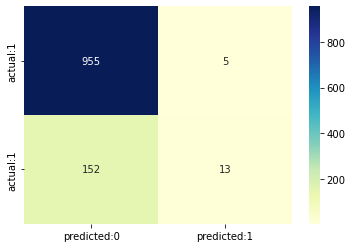

In [140]:
cm=confusion_matrix(y_test,prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['predicted:0','predicted:1'],index=['actual:1','actual:1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [143]:
print(accuracy_score(y_test,prediction))

0.8604444444444445


In [146]:
file_name='CHDpredMod.sav'
pickle.dump(logmodel,open(file_name,'wb'))